In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']

In [7]:
X = StandardScaler().fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [10]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [11]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [12]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

In [13]:
knn=KNeighborsClassifier()

In [14]:
knn.fit(X_train,y_train)

In [15]:
y_pred=knn.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       101
           1       0.71      0.74      0.72        53

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [18]:
cm=confusion_matrix(y_pred,y_test)

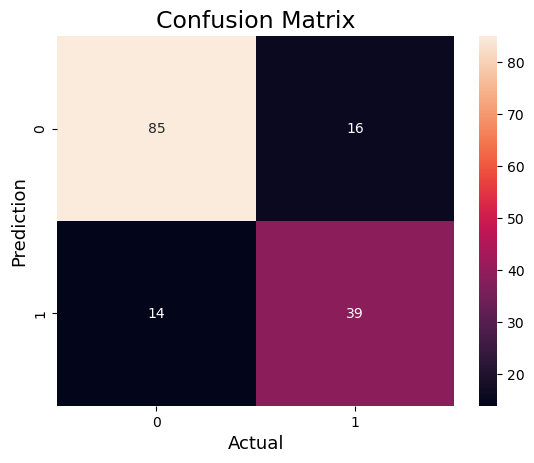

In [19]:
sns.heatmap(cm, annot=True,fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
a=[]
# Loop through different values of k from 1 to 99
for i in range(1,100):
    clf = KNeighborsClassifier(i)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    a.append(accuracy_score(y_test, prediction))

In [22]:
a

[0.7532467532467533,
 0.7662337662337663,
 0.7922077922077922,
 0.7727272727272727,
 0.8051948051948052,
 0.7662337662337663,
 0.8181818181818182,
 0.7857142857142857,
 0.8051948051948052,
 0.7857142857142857,
 0.8051948051948052,
 0.7987012987012987,
 0.8181818181818182,
 0.7922077922077922,
 0.8051948051948052,
 0.8051948051948052,
 0.8116883116883117,
 0.7922077922077922,
 0.7922077922077922,
 0.7922077922077922,
 0.7792207792207793,
 0.7857142857142857,
 0.7597402597402597,
 0.7662337662337663,
 0.7597402597402597,
 0.7662337662337663,
 0.7597402597402597,
 0.7597402597402597,
 0.7662337662337663,
 0.7467532467532467,
 0.7597402597402597,
 0.7597402597402597,
 0.7532467532467533,
 0.7467532467532467,
 0.7532467532467533,
 0.7597402597402597,
 0.7597402597402597,
 0.7727272727272727,
 0.7662337662337663,
 0.7662337662337663,
 0.7727272727272727,
 0.7727272727272727,
 0.7727272727272727,
 0.7662337662337663,
 0.7727272727272727,
 0.7662337662337663,
 0.7597402597402597,
 0.7597402597

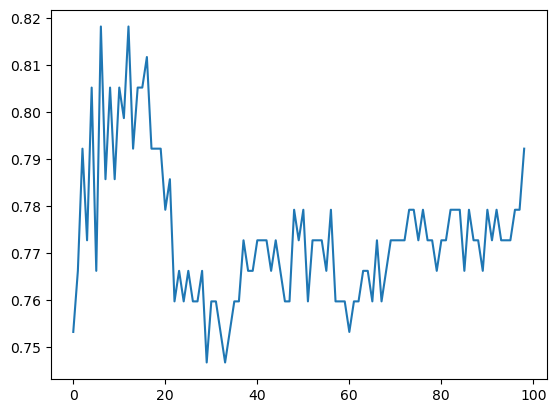

In [23]:
plt.plot(a)
plt.show()